В данной работе предлагается решить задачу мультиклассовой классификации для датасета флагов различных стран
(https://archive.ics.uci.edu/ml/datasets/Flags)

Загрузить данные из папки Data Folder

Провести описательный анализ предложенных данных

Предложить стратегию по работе с категориальными переменными

Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага

Рассчитать Feature Importances для переменных модели

Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

Построить Confusion Matrix для ваших результатов

## 1. Загрузить данные из папки Data Folder

In [1]:
# подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
cols = ['name','landmass','zone','area','population','language','religion','bars','stripes',
       'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
       'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
       'text','topleft','botright']

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('flag.data', header=None, names=cols)
df.head(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red


In [52]:
df_origin = df.copy()

## 2. Провести описательный анализ предложенных данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [15]:
df.mainhue.unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

In [16]:
df.mainhue.value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [17]:
df.topleft.unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [18]:
df.topleft.value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [19]:
df.botright.unique()

array(['green', 'red', 'white', 'black', 'blue', 'gold', 'orange',
       'brown'], dtype=object)

In [22]:
df.botright.value_counts()

red       69
blue      47
green     40
white     17
gold       9
black      9
brown      2
orange     1
Name: botright, dtype: int64

In [23]:
df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,0.268041,0.134021,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,0.444085,0.341556,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df_copy = df.copy()
df_copy.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')

In [37]:
df_copy = df_copy.drop(['name', 'mainhue', 'topleft', 'botright'], axis=1)

n=df_copy.columns
sc = StandardScaler()
df_copy = sc.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy, columns = n)

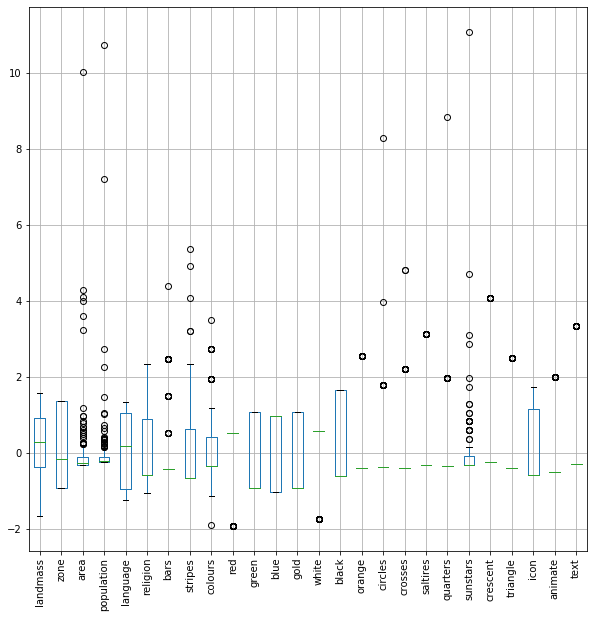

In [39]:
df_copy.boxplot(rot=90, figsize=(10,10))

## 3. Предложить стратегию по работе с категориальными переменными

In [5]:
# OneHotEncoding
df = pd.get_dummies(df, columns = ['mainhue', 'topleft', 'botright'])
df.head(2)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## 4. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

In [54]:
df_corr = df_origin.copy()

In [84]:
dict_color = {}
set_color = set()
categ_var = ['mainhue', 'topleft', 'botright']
i = 0
for var in categ_var:
    b = df_corr[var].unique()
    for el in b:
         set_color.add(el)

for color in set_color:
    dict_color[color] = i
    i += 1

dict_color

{'black': 0,
 'white': 1,
 'blue': 2,
 'red': 3,
 'orange': 4,
 'gold': 5,
 'brown': 6,
 'green': 7}

In [88]:
for var in categ_var:
    df_corr[var] = df_corr[var].map(dict_color)

In [90]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null int64
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
tex

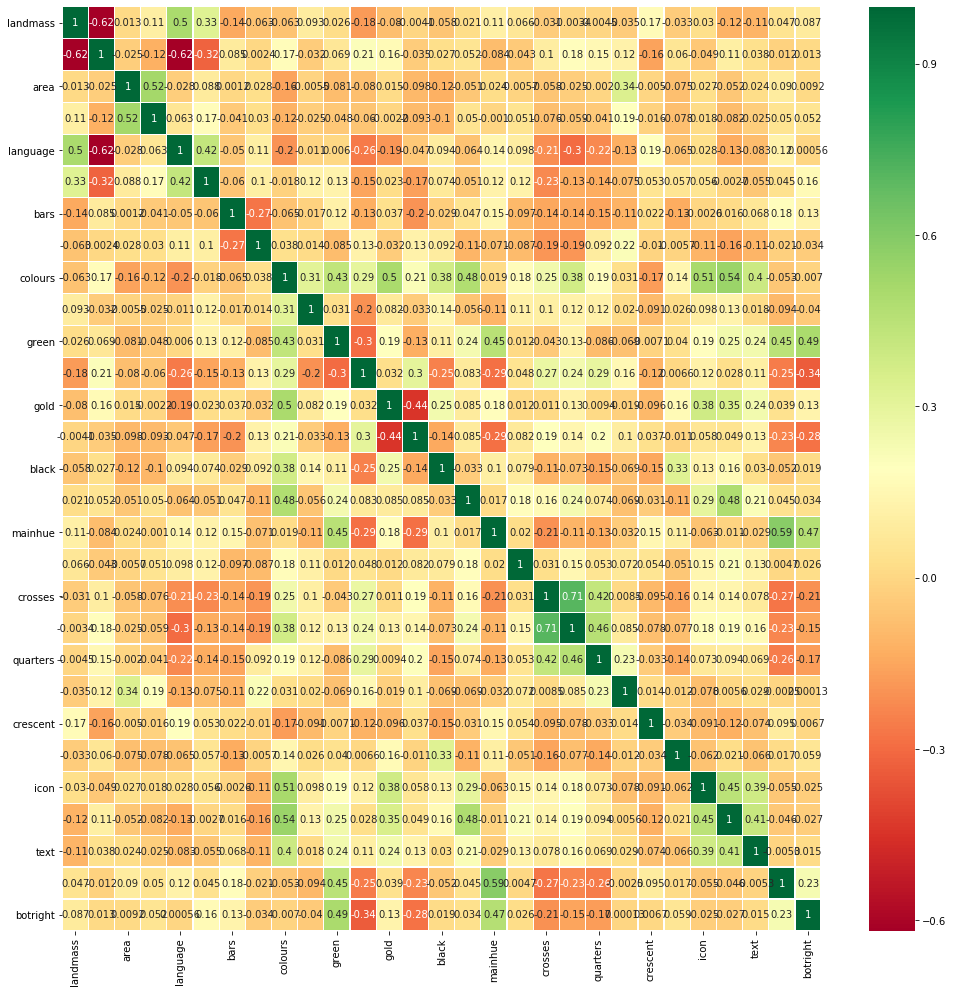

In [92]:
# строим матрицу корреляций
sns.heatmap(df_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(17,17)
plt.show()

Ярко выраженной линейной взаимосвязи целевой переменной с признаки нет, отобразим наиболее сильные из существующих взаимосвязи

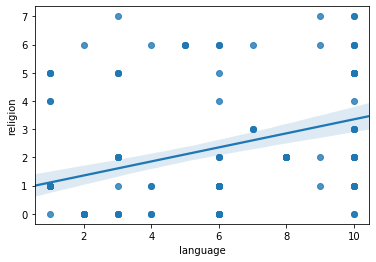

In [93]:
# религия и язык
sns.regplot(x=df_corr.language, y=df_corr.religion, fit_reg=True)

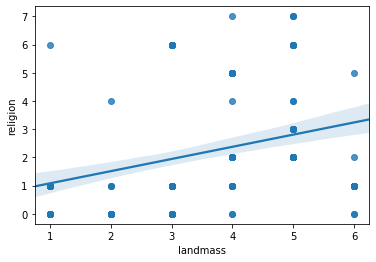

In [94]:
# религия и континент
sns.regplot(x=df_corr.landmass, y=df_corr.religion, fit_reg=True)

## 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

Признаков не много, уменьшение размерности пространства не требуется

In [102]:
df.shape[1]

50

## 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [103]:
df.religion.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

Классы не сбаланстрованы, балансировка нужна, т.к. есть совсем малочисленные классы, то лучше методом oversampling

In [6]:
# формируем признаки и целевую переменную
X = df.drop(['name', 'religion'], axis=1)
y = df.religion

In [7]:
# разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# возвращаем к типу датафрейма
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

y_resampled.value_counts()

7    40
6    40
5    40
4    40
3    40
2    40
1    40
0    40
Name: religion, dtype: int64

## 8. Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага
## &
## 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.71      0.75      0.73        20
           2       0.38      0.83      0.53         6
           3       0.00      0.00      0.00         2
           5       0.83      0.50      0.62        10
           6       0.60      0.38      0.46         8
           7       0.00      0.00      0.00         2

    accuracy                           0.63        59
   macro avg       0.46      0.47      0.44        59
weighted avg       0.63      0.63      0.61        59



C:\Users\Win10Pro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
svc = SVC()
svc.fit(X_resampled, y_resampled)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.38      0.45      0.42        11
           1       0.57      0.60      0.59        20
           2       0.23      0.50      0.32         6
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.50      0.20      0.29        10
           6       0.40      0.25      0.31         8
           7       1.00      0.50      0.67         2

    accuracy                           0.42        59
   macro avg       0.39      0.31      0.32        59
weighted avg       0.46      0.42      0.42        59



C:\Users\Win10Pro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
results = cross_val_score(rf_clf, X_resampled, y_resampled, cv=kf)

In [20]:
results.mean()

0.8286604361370716

## 9. Рассчитать Feature Importances для переменных модели

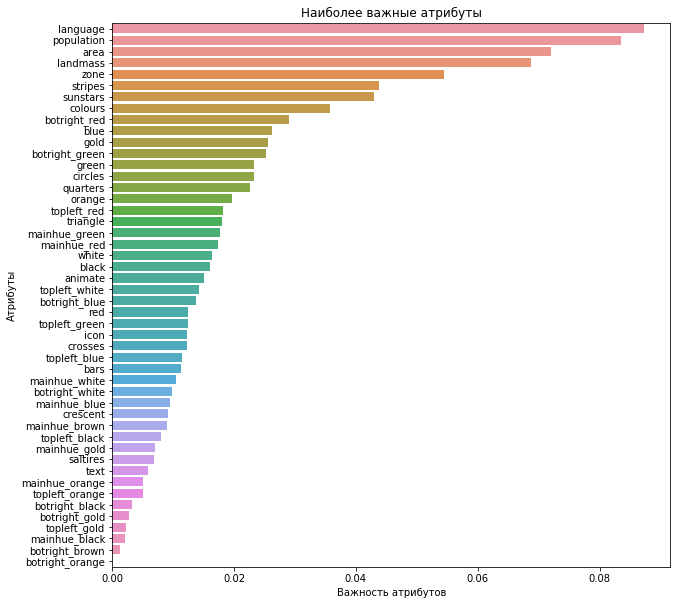

In [22]:
feature_imp = pd.Series(rf_clf.feature_importances_,index=list(X.columns)).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

## 10. Построить Confusion Matrix для ваших результатов.

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rf_clf.predict(X_test))

array([[ 9,  2,  0,  0,  0,  0,  0],
       [ 2, 15,  2,  0,  1,  0,  0],
       [ 0,  1,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  4,  0,  5,  0,  0],
       [ 2,  1,  1,  1,  0,  3,  0],
       [ 0,  1,  1,  0,  0,  0,  0]], dtype=int64)